In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lg-aimers/sample_submission.csv
/kaggle/input/lg-aimers/train.csv
/kaggle/input/lg-aimers/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv('/kaggle/input/lg-aimers/train.csv')

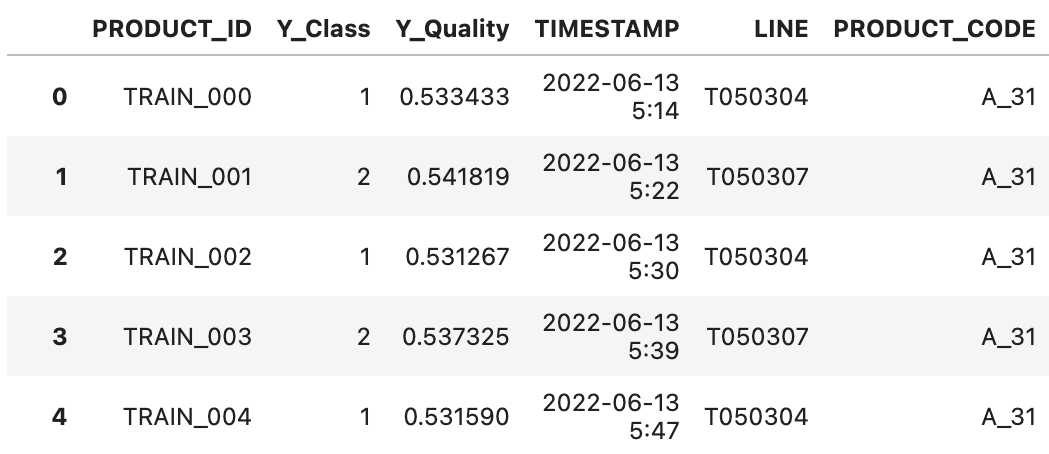
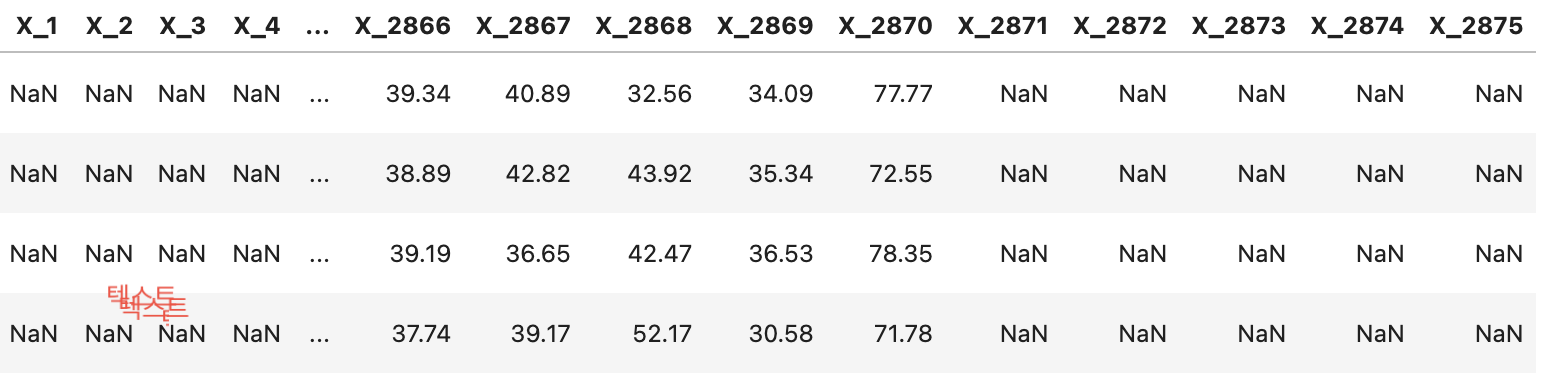

In [4]:
# 1. timestamp랑 y_class 관계 -> 특정 월에 0 or 2(부적합) 더 나오는지
df_train['MONTH'] = df_train['TIMESTAMP'].str.slice(start=5 , stop =7)

<AxesSubplot:xlabel='MONTH', ylabel='count'>

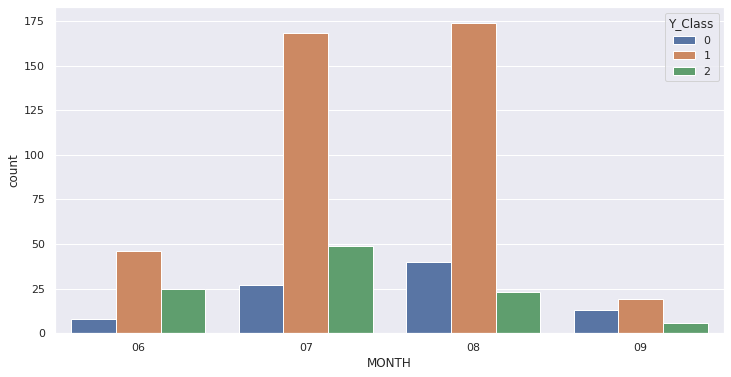

In [5]:
# 1. timestamp랑 y_class 관계 -> 특정 월에 0 or 2(부적합) 더 나오는지
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot( x='MONTH' , hue='Y_Class', data=df_train)


In [6]:
#특정 날짜에 0 or 2(부적합) 더 나오는지
df_train['DAY'] = df_train['TIMESTAMP'].str.slice(start=8 , stop =10)

<AxesSubplot:xlabel='DAY', ylabel='count'>

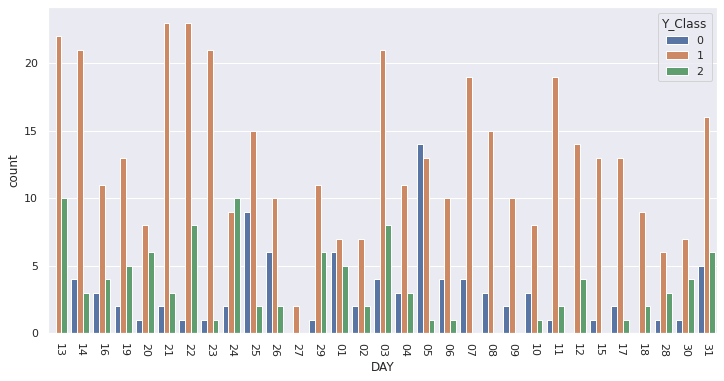

In [7]:
#특정 날짜에 0 or 2(부적합) 더 나오는지
plt.xticks(rotation = -90)
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot( x='DAY' , hue='Y_Class', data=df_train)


In [8]:
#특정 시간대에 0 or 2(부적합) 더 나오는지
df_train['TIME'] = df_train['TIMESTAMP'].str.slice(start=10,stop=13)

<AxesSubplot:xlabel='TIME', ylabel='count'>

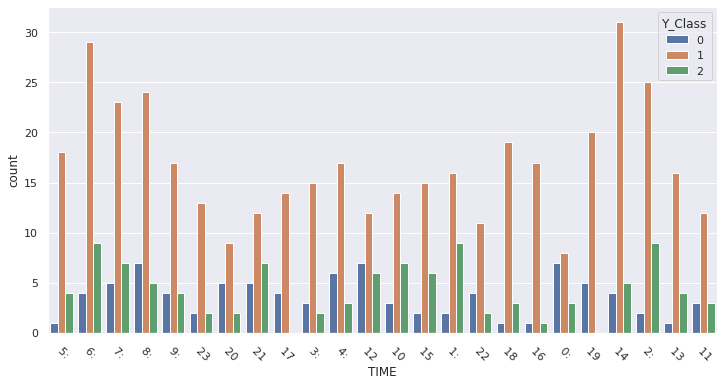

In [9]:
#특정 시간대에 0 or 2(부적합) 더 나오는지
plt.xticks(rotation = -45)
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot( x='TIME' , hue='Y_Class', data=df_train)

<AxesSubplot:xlabel='LINE', ylabel='count'>

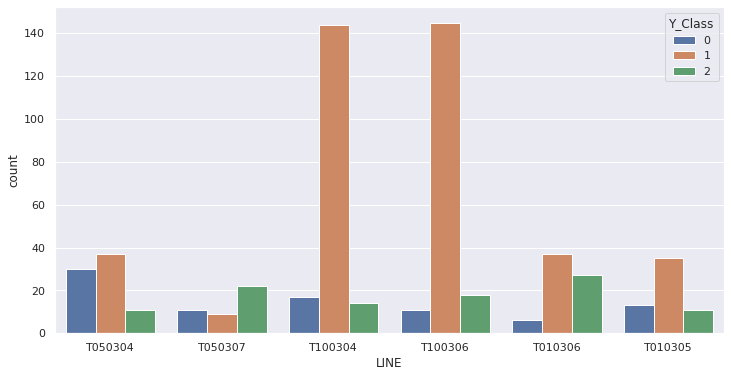

In [10]:
# 2. 특정 line에서 부적합 더 자주 나오는지
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot( x='LINE' , hue='Y_Class', data=df_train)

<AxesSubplot:xlabel='PRODUCT_CODE', ylabel='count'>

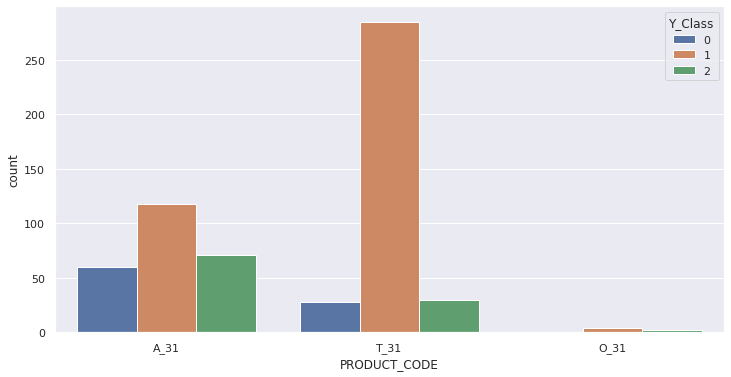

In [11]:
# 3. 특정 product_code에서 부적합 더 자주 나오는지
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot( x='PRODUCT_CODE' , hue='Y_Class', data=df_train)

<AxesSubplot:xlabel='LINE', ylabel='count'>

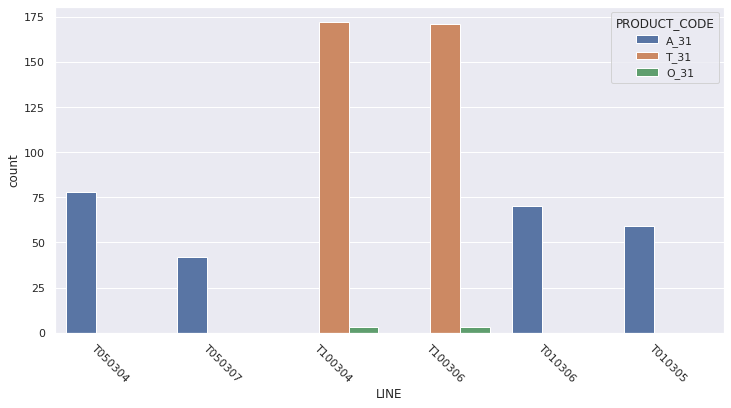

In [12]:
# 4. line별로 product_code 카운트
plt.xticks(rotation = -45)
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot( x='LINE', hue='PRODUCT_CODE', data=df_train)

# T050304,T050307,T010306,T010305 -> A_31 생산
# T100304,T100306 -> T_31, O_31 생산

In [13]:
# 5. x시리즈 사용할 방법 찾기